# Récupération du dataset

### Charger les JSON en un DataFrame et Sauvegarder cd df au format Paquet pour un rechargement plus rapide ultérieurement (Etape à faire donc une fois seulement)

In [ ]:
import os
import json
import glob
import pandas as pd
from tqdm import tqdm
from typing import List, Dict, Any

# 1. Définir le chemin vers le dossier contenant les JSON
path_to_json_folder: str = 'data/code_classification_dataset/'

# 2. Récupérer la liste de tous les fichiers .json
json_files: List[str] = glob.glob(os.path.join(path_to_json_folder, "*.json"))

print(f"Nombre de fichiers trouvés : {len(json_files)}")

# 3. Charger les fichiers via une boucle
# On type la liste comme une liste de Dictionnaires (clés str, valeurs de n'importe quel type)
data_list: List[Dict[str, Any]] = []

# Utiliser tqdm pour visualiser l'avancement
for file_path in tqdm(json_files):
    with open(file_path, 'r', encoding='utf-8') as f:
        try:
            content: Dict[str, Any] = json.load(f)
            # Ajouter le contenu dans la liste
            data_list.append(content)
        except Exception as e:
            print(f"Erreur avec le fichier {file_path}: {e}")

# 4. Créer le DataFrame
# json.dumps convertit la liste de dicts en string JSON, lisible proprement par pandas
df: pd.DataFrame = pd.read_json(json.dumps(data_list))

# 5. Afficher un aperçu
print(f"Dimensions du dataset : {df.shape}")
df.head(3)

Nombre de fichiers trouvés : 4982


100%|██████████| 4982/4982 [01:02<00:00, 79.43it/s] 
/tmp/ipython-input-1039092556.py:32: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df: pd.DataFrame = pd.read_json(json.dumps(data_list))


Dimensions du dataset : (4982, 21)


,prob_desc_time_limit,prob_desc_sample_outputs,src_uid,prob_desc_notes,prob_desc_description,prob_desc_output_spec,prob_desc_input_spec,prob_desc_output_to,prob_desc_input_from,lang,...,difficulty,file_name,code_uid,prob_desc_memory_limit,prob_desc_sample_inputs,exec_outcome,source_code,prob_desc_created_at,tags,hidden_unit_tests
0,2 seconds,"[""100"", ""-1"", ""2"", ""2""]",a9ccc8ab91d7ea2a2de074fdc305c3c8,NoteIn the first test it is possible to place ...,"There are $$$n$$$ detachments on the surface, ...",Output such minimal integer $$$t$$$ that it is...,The first line contains a single integer $$$n$...,standard output,standard input,PyPy 3,...,2800.0,train_043.jsonl,0eaf4f1cc58548705d07d08061346718,256 megabytes,"[""4\n100 0\n0 100\n-100 0\n0 -100"", ""7\n0 2\n1...",PASSED,# import numpy as npy\nimport functools\nimpor...,2020-09-19 14:35:00,"[graphs, dsu, implementation, data structures,...",
1,2 seconds,"[""8000\n0179\n3159\n3210\n0112\n0123""]",ad56be6638b54bc91e6e9e25f0cfb2d9,"NoteThe secret string s in the example is ""0123"".",The only difference from the previous problem ...,The program must use the standard output to pr...,"To read answers to the queries, the program mu...",standard output,standard input,Python 3,...,2500.0,train_010.jsonl,fff90d8a1ca815ffc22183face6f7c0b,256 megabytes,"[""0 1\n2 0\n1 1\n0 4\n2 1\n4 0""]",PASSED,import random\nimport sys\n\ndef valid(st) :\n...,2016-12-29 09:05:00,"[constructive algorithms, brute force, interac...",
2,1 second,"[""142857"", ""Impossible"", ""102564""]",86dc5cb9e667fc2ae4d988613feddcb6,NoteSample 1: 142857·5 = 714285.Sample 2: The ...,Teacher thinks that we make a lot of progress....,If the teacher's made a mistake and such numbe...,"The single line contains integers p, x (1 ≤ p ...",standard output,standard input,Python 3,...,NaN,train_070.jsonl,94f99c26af7d19738cc24a431e5c839a,256 megabytes,"[""6 5"", ""1 2"", ""6 4""]",PASSED,"p, k = map(int, input().split())\nu = 10 * k -...",2014-02-20 15:30:00,[math],


In [ ]:
# Chemin de sauvegarde (pour ne pas recharger les json à chaque fois)
# Le CSV gère mal les listes (comme la colonne tags).
# Il va la transformer en chaîne de caractères "['math', 'greedy']" qu'il faudra re-parser.
# Le Parquet conserve le format liste et compresse mieux les données.
output_file : str = 'data/dataset_raw.parquet'

# Sauvegarde
df.to_parquet(output_file, index=False)
print("Dataset sauvegardé au format Parquet !")

Dataset sauvegardé au format Parquet !


### Chargement du DataFrame déjà créé

In [ ]:
import pandas as pd
df : pd.DataFrame = pd.read_parquet('data/dataset_raw.parquet')

In [10]:
df

,prob_desc_time_limit,prob_desc_sample_outputs,src_uid,prob_desc_notes,prob_desc_description,prob_desc_output_spec,prob_desc_input_spec,prob_desc_output_to,prob_desc_input_from,lang,...,difficulty,file_name,code_uid,prob_desc_memory_limit,prob_desc_sample_inputs,exec_outcome,source_code,prob_desc_created_at,tags,hidden_unit_tests
0,2 seconds,"[""100"", ""-1"", ""2"", ""2""]",a9ccc8ab91d7ea2a2de074fdc305c3c8,NoteIn the first test it is possible to place ...,"There are $$$n$$$ detachments on the surface, ...",Output such minimal integer $$$t$$$ that it is...,The first line contains a single integer $$$n$...,standard output,standard input,PyPy 3,...,2800.0,train_043.jsonl,0eaf4f1cc58548705d07d08061346718,256 megabytes,"[""4\n100 0\n0 100\n-100 0\n0 -100"", ""7\n0 2\n1...",PASSED,# import numpy as npy\nimport functools\nimpor...,2020-09-19 14:35:00,"[graphs, dsu, implementation, data structures,...",
1,2 seconds,"[""8000\n0179\n3159\n3210\n0112\n0123""]",ad56be6638b54bc91e6e9e25f0cfb2d9,"NoteThe secret string s in the example is ""0123"".",The only difference from the previous problem ...,The program must use the standard output to pr...,"To read answers to the queries, the program mu...",standard output,standard input,Python 3,...,2500.0,train_010.jsonl,fff90d8a1ca815ffc22183face6f7c0b,256 megabytes,"[""0 1\n2 0\n1 1\n0 4\n2 1\n4 0""]",PASSED,import random\nimport sys\n\ndef valid(st) :\n...,2016-12-29 09:05:00,"[constructive algorithms, brute force, interac...",
2,1 second,"[""142857"", ""Impossible"", ""102564""]",86dc5cb9e667fc2ae4d988613feddcb6,NoteSample 1: 142857·5 = 714285.Sample 2: The ...,Teacher thinks that we make a lot of progress....,If the teacher's made a mistake and such numbe...,"The single line contains integers p, x (1 ≤ p ...",standard output,standard input,Python 3,...,NaN,train_070.jsonl,94f99c26af7d19738cc24a431e5c839a,256 megabytes,"[""6 5"", ""1 2"", ""6 4""]",PASSED,"p, k = map(int, input().split())\nu = 10 * k -...",2014-02-20 15:30:00,[math],
3,2 seconds,"[""-120\n12\n0\n945""]",a3a64c3c7e9349d6e663c2d8113d2676,"NoteIn the first test case, choosing $$$a_1,a_...","You are given an array of integers $$$a_1,a_2,...","For each test case, print one integer — the an...",The input consists of multiple test cases. The...,standard output,standard input,Python 3,...,1200.0,train_005.jsonl,ba05fbd4dd9e2594fe97cc8825db17c0,512 megabytes,"[""4\n5\n-1 -2 -3 -4 -5\n6\n-1 -2 -3 1 2 -1\n6\...",PASSED,l=[]\nfor _ in range(int(input())):\n N=int...,2020-09-12 13:45:00,"[dp, greedy, implementation, sortings, brute f...",
4,1 second,"[""8\n1 2\n4 3\n3 2\n4 1\n-1\n12\n3 2\n1 2\n3 1""]",f6e219176e846b16c5f52dee81601c8e,None,Hanh lives in a shared apartment. There are $$...,"For each test case: If there is no solution,...",Each test contains multiple test cases. The fi...,standard output,standard input,PyPy 3,...,1100.0,train_008.jsonl,12f858c06350edeb93ea73cac79c9704,256 megabytes,"[""3\n4 4\n1 1 1 1\n3 1\n1 2 3\n3 3\n1 2 3""]",PASSED,"t=int(input())\nwhile t>0:\n\tn,m =map(int,inp...",2019-11-19 14:35:00,"[implementation, graphs]",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4977,1 second,"[""Infinite\nFinite\nInfinite\nFinite""]",388450021f2f33177d905879485bb531,None,Consider the set of all nonnegative integers: ...,"For each test case, print one line containing ...",The first line of input contains a single inte...,standard output,standard input,PyPy 3,...,1000.0,train_005.jsonl,660aeacbab8aee24d13269408d58f40f,256 megabytes,"[""4\n10 10\n1 10\n6 9\n7 3""]",PASSED,tests = int(input())\nfor _ in range(tests):\n...,2019-11-01 14:35:00,"[number theory, math]",
4978,2 seconds,"[""-1"", ""2 1"", ""2 1 4 3""]",204ba74195a384c59fb1357bdd71e16c,None,"A permutation is a sequence of integers p1, p2...",If a perfect permutation of size n doesn't exi...,A single line contains a single integer n (1 ≤...,standard output,standard input,PyPy 2,...,800.0,train_005.jsonl,740a2db6ab0dc489cc5f948c0

# Création d'une colonne prob_desc_description_cleaned (Supression des Stopwords, Lowercasing, Suppression des caractères LaTex)

In [ ]:
import re
from typing import Optional
import nltk
nltk.download('stopwords')
# --- Configuration ---
LATEX_PATTERN = r'\$\$?.*?\$\$?'
STOP_WORDS = set(stopwords.words('english'))

def _clean_description(text: Optional[str]) -> str:
    """
    Nettoie un texte :
    - supprime les expressions LaTeX
    - passe en minuscules
    - supprime les stop words anglais

    Args:
        text (Optional[str]): Texte brut

    Returns:
        str: Texte nettoyé
    """
    if not isinstance(text, str):
        return ""

    # Supprimer le LaTeX
    text = re.sub(LATEX_PATTERN, " ", text)

    # Lowercase
    text = text.lower()

    # Tokenisation simple + suppression stop words
    tokens = [
        token for token in text.split()
        if token not in STOP_WORDS
    ]

    return " ".join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from tqdm import tqdm

tqdm.pandas()

print("Nettoyage du texte en cours...")
df["prob_desc_description_cleaned"] = (
    df["prob_desc_description"]
    .progress_apply(_clean_description)
)

Nettoyage du texte en cours...


100%|██████████| 4982/4982 [00:00<00:00, 12386.63it/s]


# Creation d'une colonne "source_code_cleaned" en supprimant les mots clés de python

In [ ]:
# Vérification des langages de programmation présents dans le dataset
valeurs_uniques = df['lang'].unique()
print(valeurs_uniques)

In [ ]:
import pandas as pd
import re

# Liste des mots-clés à python qui seraient communs dans tous les codes
PYTHON_STOP_WORDS = {
    'def', 'return', 'if', 'else', 'while', 'import', 'from',
    'print', 'continue', 'elif', 'sys', 'break', 'pass', 'for',
    'in', 'range'
}

def _clean_code(code_str: str) -> str:
    """
    Retire les mots-clés Python d'une chaîne de caractères.
    """
    if not isinstance(code_str, str):
        return ""

    # 1. Construire le pattern regex : \b(def|return|if|...)\b
    # \b signifie "boundary" (frontière de mot), pour ne pas couper "definition" en "inition"
    pattern = r'\b(' + '|'.join(re.escape(word) for word in PYTHON_STOP_WORDS) + r')\b'

    # 2. Remplacer par un espace
    cleaned_code = re.sub(pattern, ' ', code_str)
    # 3. Suppression des parenthèses
    cleaned_code = cleaned_code.replace('(', ' ').replace(')', ' ')
    # 4. Nettoyer les espaces multiples et sauts de ligne
    return " ".join(cleaned_code.split())

def enrich_data_with_code_cleaned(df: pd.DataFrame) -> pd.DataFrame:
    """
    Créer une colonne combinant description et code source nettoyé (sans mots clés).
    """
    print("Nettoyage du code source (suppression des mots-clés python)...")

    # Créer la colonne intermédiaire 'code_source_cleaned'
    # On applique la fonction de suppression des mots clés
    df['source_code_cleaned'] = df['source_code'].astype(str).apply(_clean_code)

    return df


df = enrich_data_with_code_cleaned(df)
df.head(2)

Nettoyage du code source (suppression des mots-clés python)...


,prob_desc_time_limit,prob_desc_sample_outputs,src_uid,prob_desc_notes,prob_desc_description,prob_desc_output_spec,prob_desc_input_spec,prob_desc_output_to,prob_desc_input_from,lang,...,code_uid,prob_desc_memory_limit,prob_desc_sample_inputs,exec_outcome,source_code,prob_desc_created_at,tags,hidden_unit_tests,prob_desc_description_cleaned,source_code_cleaned
0,2 seconds,"[""100"", ""-1"", ""2"", ""2""]",a9ccc8ab91d7ea2a2de074fdc305c3c8,NoteIn the first test it is possible to place ...,"There are $$$n$$$ detachments on the surface, ...",Output such minimal integer $$$t$$$ that it is...,The first line contains a single integer $$$n$...,standard output,standard input,PyPy 3,...,0eaf4f1cc58548705d07d08061346718,256 megabytes,"[""4\n100 0\n0 100\n-100 0\n0 -100"", ""7\n0 2\n1...",PASSED,# import numpy as npy\nimport functools\nimpor...,2020-09-19 14:35:00,"[graphs, dsu, implementation, data structures,...",,"n detachments surface, numbered 1 n , -th deta...",# numpy as npy functools math n= x=[0 i n+2 ] ...
1,2 seconds,"[""8000\n0179\n3159\n3210\n0112\n0123""]",ad56be6638b54bc91e6e9e25f0cfb2d9,"NoteThe secret string s in the example is ""0123"".",The only difference from the previous problem ...,The program must use the standard output to pr...,"To read answers to the queries, the program mu...",standard output,standard input,Python 3,...,fff90d8a1ca815ffc22183face6f7c0b,256 megabytes,"[""0 1\n2 0\n1 1\n0 4\n2 1\n4 0""]",PASSED,import random\nimport sys\n\ndef valid(st) :\n...,2016-12-29 09:05:00,"[constructive algorithms, brute force, interac...",,difference previous problem constraint number ...,"random valid st : set x x st == 4 comp guess, ..."


# Création d'une colonne qui est la concaténation de 'prob_desc_description_cleaned' et 'source_code_cleaned'

* Hypothèse : Le texte décrit le problème ("Alice a des pommes..."), mais le code contient la solution ("print(a % b)").

* Action : Concaténer le code source avec la description textuelle.

* Impact attendu : Des mots-clés comme gcd, pow, math.sqrt, vont aider à récupérer la classe math et number theory.

In [ ]:
import pandas as pd
import numpy as np


print("Création d'une colonne qui combine la description nettoyée et le code source nettoyé...")

# S'assurer que les données sont des chaines de caractères
# On gère les NaN éventuels dans le code
descriptions = df['prob_desc_description_cleaned'].astype(str)

# Pour le code, on nettoie sommairement les sauts de ligne
codes = df['source_code_cleaned'].astype(str).apply(
    lambda x: " ".join(x.split())
)

# Concaténation avec un séparateur clair
df['cleaned_description_and_code_source'] = descriptions + " " + codes


# Aperçu pour vérifier
print("\nExemple du résultat :")
print(df['cleaned_description_and_code_source'].iloc[0][:-500]) # On affiche la fin (là où il y a le code)

Création d'une colonne qui combine la description nettoyée et le code source nettoyé...

Exemple du résultat :
n detachments surface, numbered 1 n , -th detachment placed point coordinates (x_i, y_i) . detachments placed different points.brimstone visit detachment least once. choose detachment brimstone starts.to move one detachment another first choose one four directions movement (up, right, left down) start moving constant speed one unit interval second comes detachment. reaches arbitrary detachment, repeat process.each seconds orbital strike covers whole surface, moment brimstone point detachment located. stay detachment long needed.brimstone good commander, that's create one detachment place empty point integer coordinates wants trip. keep mind brimstone need visit detachment, too.help brimstone find minimal possible check detachment. report it. # numpy as npy functools math n= ( ()) x=[0 i (n+2)] y=[0 i (n+2)] adj=[[] i (n+2)] idx=[] idy=[] i (n): x[i],y[i]=map( , ().split()) idx

# Filtrage des Tags et Encodage Multi-Hot

**Le choix du Multi-Hot**:
* Un exercice peut appartenir à plusieurs catégories en même temps (ex. Math ET Géométrie).
* Chaque dimension du vecteur indique indépendamment la présence ou l’absence d’un tag (1 ou 0).
* Un encodage classique (Math=1, Graphes=2) suggérerait un ordre fictif, le Multi-Hot permet de prédire plusieurs labels simultanément.


* Techniquement, cela permet d’utiliser une Sigmoïde sur chaque neurone de sortie : chaque neurone calcule une probabilité entre 0 et 1 indépendamment des autres, ce qui correspond à notre besoin multi-label. Une activation Softmax normaliserait toutes les sorties pour que leur somme soit égale à 1, ce qui empêche de prédire plusieurs catégories en même temps.

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
from typing import List


# Définir la liste des tags cibles imposés par le challenge
TARGET_TAGS: List[str] = [
    'math', 'graphs', 'strings', 'number theory',
    'trees', 'geometry', 'games', 'probabilities'
]

def filter_tags(tags_list: List[str]) -> List[str]:
    """
    Filtrer la liste des tags pour ne garder que ceux présents dans TARGET_TAGS.

    Args:
        tags_list (List[str]): La liste des tags bruts d'un exercice.

    Returns:
        List[str]: Une nouvelle liste contenant uniquement les tags cibles.
    """
    return [tag for tag in tags_list if tag in TARGET_TAGS]



# 1. Ne garder que les tags pertinents pour chaque ligne
df['filtered_tags'] = df['tags'].apply(filter_tags)

# 2. Initialiser l'encodeur Multi-Label
mlb: MultiLabelBinarizer = MultiLabelBinarizer(classes=TARGET_TAGS)

# 3. Transformer les listes de tags en vecteurs binaires
y: np.ndarray = mlb.fit_transform(df['filtered_tags'])

# 4. Convertir cette matrice en DataFrame pour une meilleure lisibilité
y_df: pd.DataFrame = pd.DataFrame(y, columns=mlb.classes_)

# 5. Concaténer les cibles avec le dataframe original
df: pd.DataFrame = pd.concat([df, y_df], axis=1)

# Sauvegarder le dataset enrichi
df.to_parquet('/content/drive/MyDrive/dataset_filtered.parquet')

In [19]:
df.head(2)

,prob_desc_time_limit,prob_desc_sample_outputs,src_uid,prob_desc_notes,prob_desc_description,prob_desc_output_spec,prob_desc_input_spec,prob_desc_output_to,prob_desc_input_from,lang,...,cleaned_description_and_code_source,filtered_tags,math,graphs,strings,number theory,trees,geometry,games,probabilities
0,2 seconds,"[""100"", ""-1"", ""2"", ""2""]",a9ccc8ab91d7ea2a2de074fdc305c3c8,NoteIn the first test it is possible to place ...,"There are $$$n$$$ detachments on the surface, ...",Output such minimal integer $$$t$$$ that it is...,The first line contains a single integer $$$n$...,standard output,standard input,PyPy 3,...,"n detachments surface, numbered 1 n , -th deta...",[graphs],0,1,0,0,0,0,0,0
1,2 seconds,"[""8000\n0179\n3159\n3210\n0112\n0123""]",ad56be6638b54bc91e6e9e25f0cfb2d9,"NoteThe secret string s in the example is ""0123"".",The only difference from the previous problem ...,The program must use the standard output to pr...,"To read answers to the queries, the program mu...",standard output,standard input,Python 3,...,difference previous problem constraint number ...,[],0,0,0,0,0,0,0,0


In [3]:
import pandas as pd
df : pd.DataFrame = pd.read_parquet('data/dataset_filtered.parquet')

# EDA : Analyse Exploratoire des Données

Pour cette EDA , nous allons regarder les éléments suivants


*   La répartition des tags

*   La corrélation entre les tags

*   Quelle est la longueur des textes

*   Le vocabulaire

### 1. Fréquence de chaque tag

In [11]:
# Définir la liste des tags cibles imposés par le challenge
from typing import List 
TARGET_TAGS: List[str] = [
    'math', 'graphs', 'strings', 'number theory',
    'trees', 'geometry', 'games', 'probabilities'
]
print("Distribution des classes (nombre d'exemples positifs) :")
print(df[TARGET_TAGS].sum().sort_values(ascending=False))


Distribution des classes (nombre d'exemples positifs) :
math             1408
graphs            542
strings           422
number theory     350
trees             324
geometry          166
games             105
probabilities      92
dtype: int64


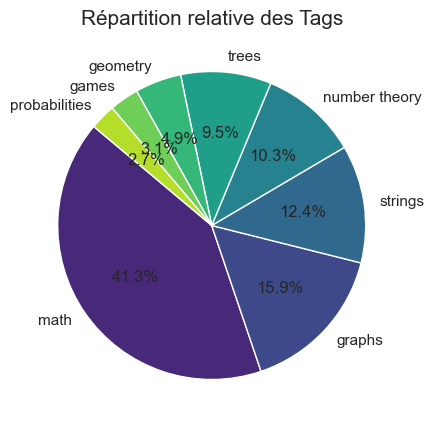

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcul des fréquences
# On s'assure que TARGET_TAGS est bien défini (comme dans votre code précédent)
tag_counts = df[TARGET_TAGS].sum().sort_values(ascending=False)
sns.set_theme(style="whitegrid")

# --- Camembert (Pie Chart) ---
plt.figure(figsize=(5, 5))
plt.pie(
    tag_counts, 
    labels=tag_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('viridis', len(tag_counts)),
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Répartition relative des Tags', fontsize=15)
plt.show()

La distribution est fortement déséquilibrée avec une long tail.


En multi-label, cela implique un risque de sur-optimisation des classes fréquentes.


Eventuellement utiliser des métriques macro (sensibles aux classes rares), et des classifier chains pour exploiter les dépendances.

### 2. Analyse des Corrélations entre Tags

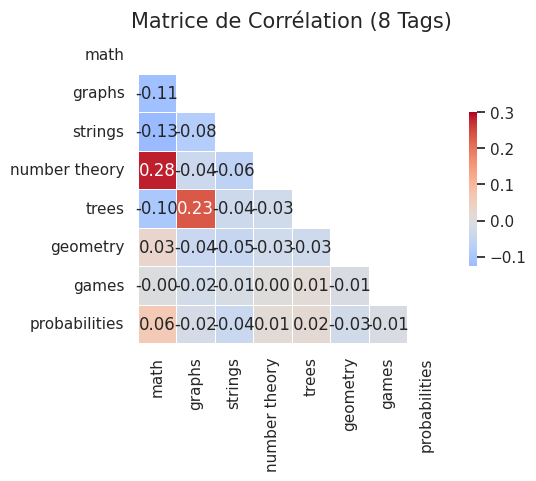

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set_theme(style="white")

def plot_correlation_matrix(targets_df: pd.DataFrame) -> None:
    """
    Afficher la matrice de corrélation de Pearson de manière robuste.
    Gère les doublons de colonnes éventuels.
    """
    # Calculer la corrélation
    corr: pd.DataFrame = targets_df.corr()

    # Créer le masque
    # On force le masque à avoir EXACTEMENT la même forme que la matrice de corrélation
    mask = np.triu(np.ones(corr.shape, dtype=bool))


    plt.figure(figsize=(6, 4))
    sns.heatmap(
        corr,
        mask=mask,
        cmap="coolwarm",
        vmax=.3,
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .5},
        annot=True,
        fmt=".2f"
    )

    plt.title(f"Matrice de Corrélation ({corr.shape[0]} Tags)", fontsize=15)
    plt.show()

plot_correlation_matrix(y_df)

**Analyse de la Matrice de Corrélation**
1. Exploiter les corrélations positives (Co-occurrence)

*   Math & Number Theory (0.28) et Graphs & Trees (0.23) présentent les liens les plus forts.
*   Action : Configurer le modèle pour permettre la co-activation de ces neurones de sortie. Prédire "Tree" doit augmenter la probabilité de prédire "Graph".

2. Utiliser les corrélations négatives (Exclusion)

*   Math vs Strings (-0.13) montre une séparation nette des domaines.
*   Action : Tirer parti des features textuelles spécifiques (vocabulaire de manipulation de chaînes) pour pénaliser la probabilité de la classe "Math".

3. Conclusion pour la modélisation
*   Les étiquettes ne sont pas indépendantes.
*   Écarter les approches de type "8 classifieurs binaires isolés" (One-Vs-Rest simple). Privilégier une architecture capable d'apprendre les interactions entre labels, comme un Réseau de Neurones ou des méthodes de Classifier Chains.

### 3. Analyse de la Longueur des Textes

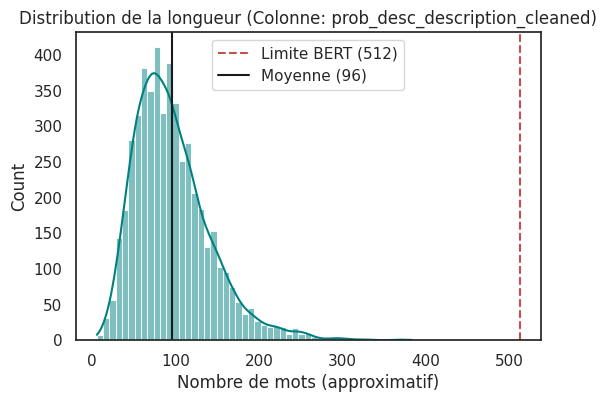

Moyenne de mots : 96
Pourcentage de textes > 512 mots : 0.00%


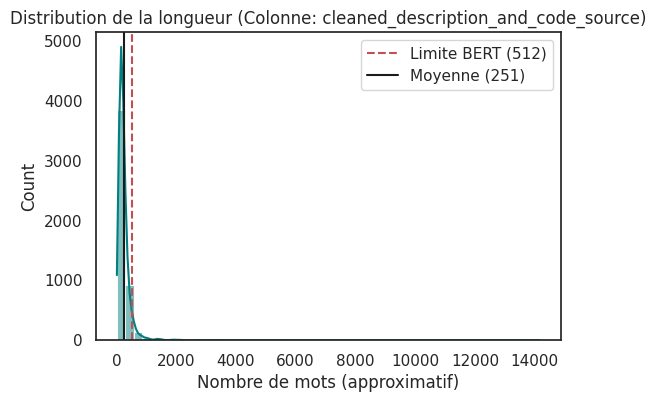

Moyenne de mots : 251
Pourcentage de textes > 512 mots : 6.52%


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_text_length_distribution(df: pd.DataFrame, col_name: str) -> None:
    """
    Afficher la distribution du nombre de mots par description sur le texte brut.
    """
    # Calculer le nombre de mots (approximation via split sur les espaces
    seq_len: pd.Series = df[col_name].apply(lambda x: len(str(x).split()))


    plt.figure(figsize=(6, 4))
    sns.histplot(seq_len, bins=50, kde=True, color='teal')
    plt.axvline(x=512, color='r', linestyle='--', label='Limite BERT (512)')
    plt.axvline(x=seq_len.mean(), color='k', linestyle='-', label=f'Moyenne ({int(seq_len.mean())})')
    plt.title(f"Distribution de la longueur (Colonne: {col_name})")
    plt.xlabel("Nombre de mots (approximatif)")
    plt.legend()
    plt.show()

    # Afficher les statistiques
    print(f"Moyenne de mots : {int(seq_len.mean())}")
    print(f"Pourcentage de textes > 512 mots : {np.mean(seq_len > 512) * 100:.2f}%")


plot_text_length_distribution(df, 'prob_desc_description_cleaned')
plot_text_length_distribution(df, 'cleaned_description_and_code_source')


### 4. Mots les plus fréquents dans le corpus

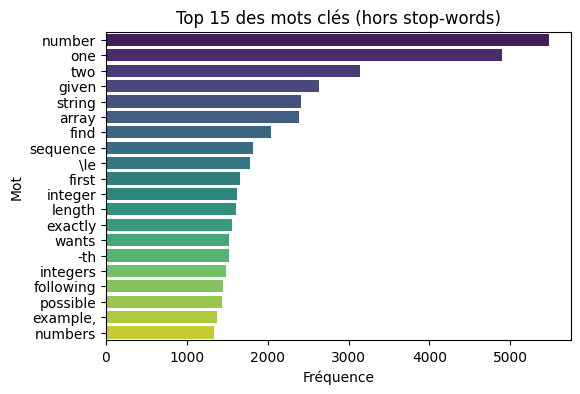

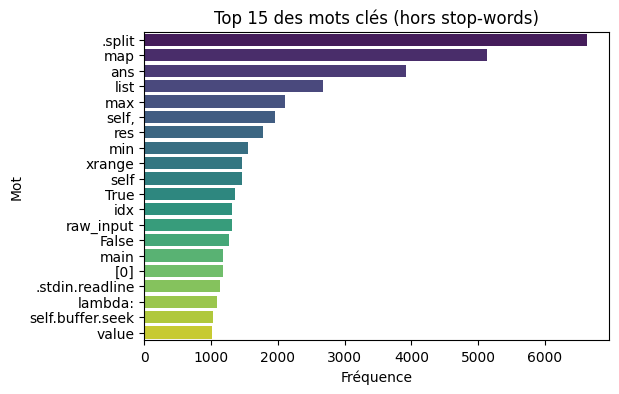

In [43]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from typing import Optional, List
from collections import Counter
from tqdm import tqdm


def plot_meaningful_words(df: pd.DataFrame, col_name: str) -> None:
    """
    Afficher les mots fréquents en excluant les stop-words anglais.
    """
    # Concaténer tout le texte
    all_text: str = " ".join(df[col_name].astype(str))

    # Découper en mots
    words: List[str] = all_text.split()

    # Filtrer les stop-words et les tokens trop courts (sauf s'ils sont pertinents)
    meaningful_words: List[str] = [
        w for w in words
        if w not in STOP_WORDS and len(w) > 2 and w != 'math'
    ]

    # Compter
    counter = Counter(meaningful_words)
    most_common = counter.most_common(20)

    # Créer le DataFrame pour le plot
    words_df = pd.DataFrame(most_common, columns=['Mot', 'Fréquence'])

    # Tracer
    plt.figure(figsize=(6, 4))
    sns.barplot(x='Fréquence', y='Mot', data=words_df, palette='viridis', hue='Mot', legend=False)
    plt.title("Top 15 des mots clés (hors stop-words)")
    plt.show()



plot_meaningful_words(df, 'prob_desc_description_cleaned')
plot_meaningful_words(df, 'source_code_cleaned')


* Redondance (Integer vs Integers) : On voit integer et integers.

* Pour une approche TF-IDF, on ferait de la Lemmatization (pour les regrouper).

* Pour une approche avec BERT, c'est inutile : son "Tokenizer" gérera ces variations automatiquement.

* On pourrait éventuellement penser à supprimer les mots clés du code source (un peu comme les stopwords du langage naturel)

# Répartition du dataset

La classe probabilities ne contient que 92 exemples. Avec un découpage aléatoire classique (train_test_split), on risque d'avoir 0 exemple de cette classe dans le jeu de test, ce qui rendrait l'évaluation fausse.

Nous allons utiliser la Stratification Itérative.

C'est l'algorithme standard pour résoudre le problème de déséquilibre en Multi-Label.

In [44]:
!pip install iterative-stratification

In [45]:
import pandas as pd
import numpy as np
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from typing import Tuple, List

# --- Configuration ---
TARGET_TAGS: List[str] = [
    'math', 'graphs', 'strings', 'number theory',
    'trees', 'geometry', 'games', 'probabilities'
]

def split_stratified_dataset(
    df: pd.DataFrame,
    target_cols: List[str],
    test_size: float = 0.2
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Diviser le dataset en conservant TOUTES les features dans X et en isolant les cibles dans y.

    Args:
        df (pd.DataFrame): Le dataframe complet.
        target_cols (List[str]): La liste des colonnes à mettre dans y (le reste ira dans X).
        test_size (float): Proportion du jeu de test.

    Returns:
        X_train, y_train, X_test, y_test (X contient toutes les colonnes sauf les cibles)
    """

    # 1. Préparer les données pour le stratifieur
    # X_dummy sert juste à donner la bonne taille à la fonction split, le contenu importe peu ici
    X_dummy = np.zeros(len(df))
    y = df[target_cols].values

    # 2. Initialiser le stratifieur
    msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)

    # 3. Récupérer les indices
    train_index: np.ndarray
    test_index: np.ndarray

    for train_idx, test_idx in msss.split(X_dummy, y):
        train_index, test_index = train_idx, test_idx

    # 4. Créer les DataFrames finaux (C'est ICI que ça change)

    # Pour X : On prend TOUT le dataframe aux indices donnés, PUIS on retire les réponses (targets)
    # Cela évite la "fuite de données" (Data Leakage) tout en gardant 'source_code', 'difficulty', etc.
    X_train = df.iloc[train_index].drop(columns=target_cols, errors='ignore')
    y_train = df.iloc[train_index][target_cols]

    X_test = df.iloc[test_index].drop(columns=target_cols, errors='ignore')
    y_test = df.iloc[test_index][target_cols]

    return X_train, y_train, X_test, y_test

# --- Exécution ---

print("Démarrage de la stratification complète...")

# Note : On n'a plus besoin de spécifier x_col, car on garde tout le reste par défaut
X_train, y_train, X_test, y_test = split_stratified_dataset(
    df,
    target_cols=TARGET_TAGS
)

print(f"Dimensions X_train : {X_train.shape}")
print(f"Dimensions X_test  : {X_test.shape}")
print("Colonnes disponibles dans X_train :", X_train.columns.tolist())

Démarrage de la stratification complète...
Dimensions X_train : (3985, 25)
Dimensions X_test  : (997, 25)
Colonnes disponibles dans X_train : ['prob_desc_time_limit', 'prob_desc_sample_outputs', 'src_uid', 'prob_desc_notes', 'prob_desc_description', 'prob_desc_output_spec', 'prob_desc_input_spec', 'prob_desc_output_to', 'prob_desc_input_from', 'lang', 'lang_cluster', 'difficulty', 'file_name', 'code_uid', 'prob_desc_memory_limit', 'prob_desc_sample_inputs', 'exec_outcome', 'source_code', 'prob_desc_created_at', 'tags', 'hidden_unit_tests', 'prob_desc_description_cleaned', 'source_code_cleaned', 'cleaned_description_and_code_source', 'filtered_tags']


In [ ]:
import os

# Définir un dossier de sortie pour que tout soit propre
OUTPUT_DIR: str = '/data/code_classification_split/'
os.makedirs(OUTPUT_DIR, exist_ok=True)

print(f"Sauvegarde en cours dans : {OUTPUT_DIR}")

# 1. Sauvegarder les Features (X)
# index=False est important pour ne pas créer une colonne d'index inutile
X_train.to_parquet(os.path.join(OUTPUT_DIR, 'X_train.parquet'), index=False)
X_test.to_parquet(os.path.join(OUTPUT_DIR, 'X_test.parquet'), index=False)

# 2. Sauvegarder les Cibles (y)
y_train.to_parquet(os.path.join(OUTPUT_DIR, 'y_train.parquet'), index=False)
y_test.to_parquet(os.path.join(OUTPUT_DIR, 'y_test.parquet'), index=False)

print("Sauvegarde terminée avec succès !")

Sauvegarde en cours dans : /content/drive/MyDrive/code_classification_split/
Sauvegarde terminée avec succès !


# Chargement des données (figées) d'entraînement et de test

In [ ]:
import pandas as pd
import os

INPUT_DIR: str = '/data/code_classification_split/'

def load_split_data(input_dir: str) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    """
    Charger les jeux de données d'entraînement et de test depuis le disque.
    """
    print("Chargement des données...")

    X_train_loaded = pd.read_parquet(os.path.join(input_dir, 'X_train.parquet'))
    y_train_loaded = pd.read_parquet(os.path.join(input_dir, 'y_train.parquet'))
    X_test_loaded  = pd.read_parquet(os.path.join(input_dir, 'X_test.parquet'))
    y_test_loaded  = pd.read_parquet(os.path.join(input_dir, 'y_test.parquet'))

    print(f"Données chargées. Train shape: {X_train_loaded.shape}, Test shape: {X_test_loaded.shape}")
    return X_train_loaded, y_train_loaded, X_test_loaded, y_test_loaded

X_train, y_train, X_test, y_test = load_split_data(INPUT_DIR)


# Utilisation de la colonne 'cleaned_description_and_code_source'
X_train = X_train['cleaned_description_and_code_source']
X_test = X_test['cleaned_description_and_code_source']

Chargement des données...
Données chargées. Train shape: (3985, 25), Test shape: (997, 25)


In [11]:
y_test.sum()


,0
math,282
graphs,108
strings,84
number theory,70
trees,65
geometry,33
games,21
probabilities,18
